In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import math
from scipy import stats

In [11]:
example = np.array([round(np.random.exponential(1), 3) for i in range(25)])
print(example)

[0.729 0.732 0.18  1.993 0.542 0.163 0.769 0.172 0.194 0.767 3.424 0.067
 0.609 2.516 0.202 4.966 0.666 1.567 0.044 0.313 0.184 2.148 0.518 0.308
 0.198]


## ПУНКТ А

In [40]:

def moda(x):
    maxcount=1
    moda=0
    for val in x:
        if len(x[x==val])>maxcount:
            maxcount=len(x[x==val])
            moda=val
    if maxcount == 1:
        return f"все элементы встречаются в единичном экземпляре"
    else:
        return moda



In [41]:

print(f"Mода: {moda(example)}")
print(f"Mедианa: {np.median(example)}")
print(f"Pазмах: {max(example) - min(example)}")
average = np.mean(example)
mu2 = np.mean((example - average) ** 2)
mu3 = np.mean((example - average) ** 3)
print(f"Kоэффициент ассиметрии: {mu3 / (mu2 ** 1.5)}")

Mода: все элементы встречаются в единичном экземпляре
Mедианa: 0.542
Pазмах: 4.922000000000001
Kоэффициент ассиметрии: 1.9596090811100542


## ПУНКТ Б

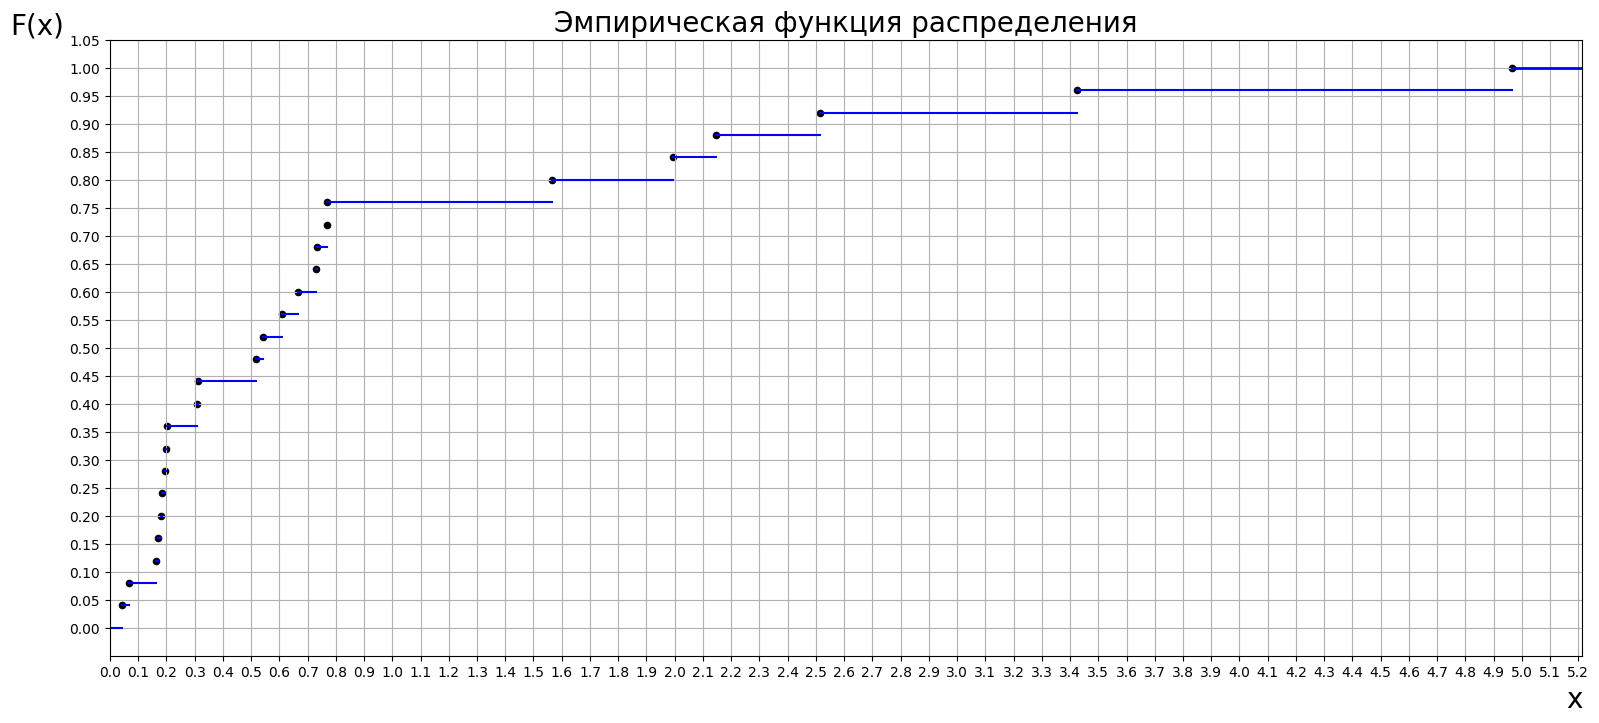

In [118]:
#Эмпирическая функция распределения
def empirical(x):
    x = np.append(0, x)
    x = np.sort(x)
    y = np.arange(0, 1.01, step = 0.04)
    plt.figure(figsize = (19,8))
    plt.xticks(np.arange(x.max() * 1.1, step = 0.1))
    plt.yticks(np.arange(1.1, step = 0.05))
    plt.xlim(x.min(), x.max() * 1.05)
    plt.grid()
    plt.title("Эмпирическая функция распределения", fontsize = 20)
    plt.xlabel("x", fontsize = 20, loc = "right")
    plt.ylabel("F(x)", fontsize = 20, loc = "top", rotation=0)
    for i in range(1, len(y)):
        plt.plot([x[i - 1], x[i]], [y[i - 1], y[i - 1]], color = "blue")
        plt.scatter(x[i], y[i], s = 20, facecolor = "black", edgecolor = "black")
    plt.plot([x.max(), x.max() * 1.05], [1, 1], color = "blue", linewidth = 2)
    plt.show()
empirical(example)

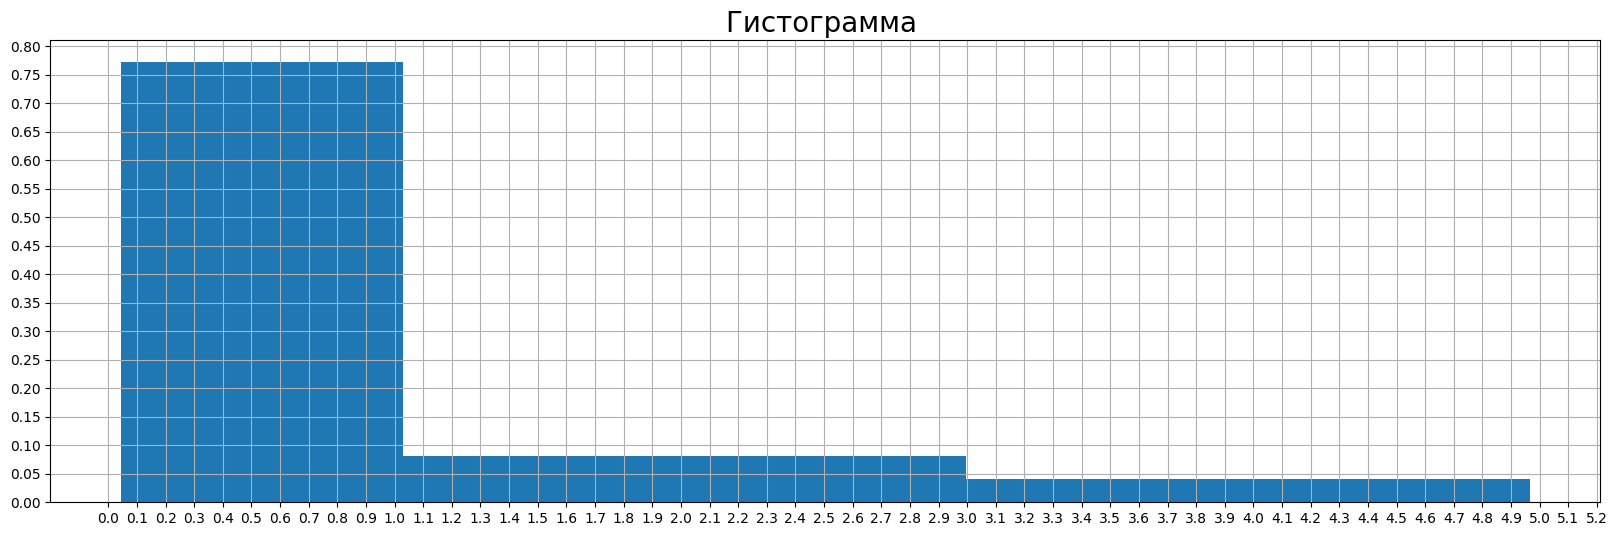

In [174]:
#гистограмма
def hystogramma(x):
    n = int(1 + np.log2(len(x)))  
    plt.figure(figsize = (20, 6))
    plt.xticks(np.arange(x.max() * 1.1, step = 0.1))
    plt.yticks(np.arange(1.1, step = 0.05))
    plt.grid()
    plt.hist(x, bins=n, density=True)
    plt.title('Гистограмма ', fontsize=20)
    plt.show()
hystogramma(example)

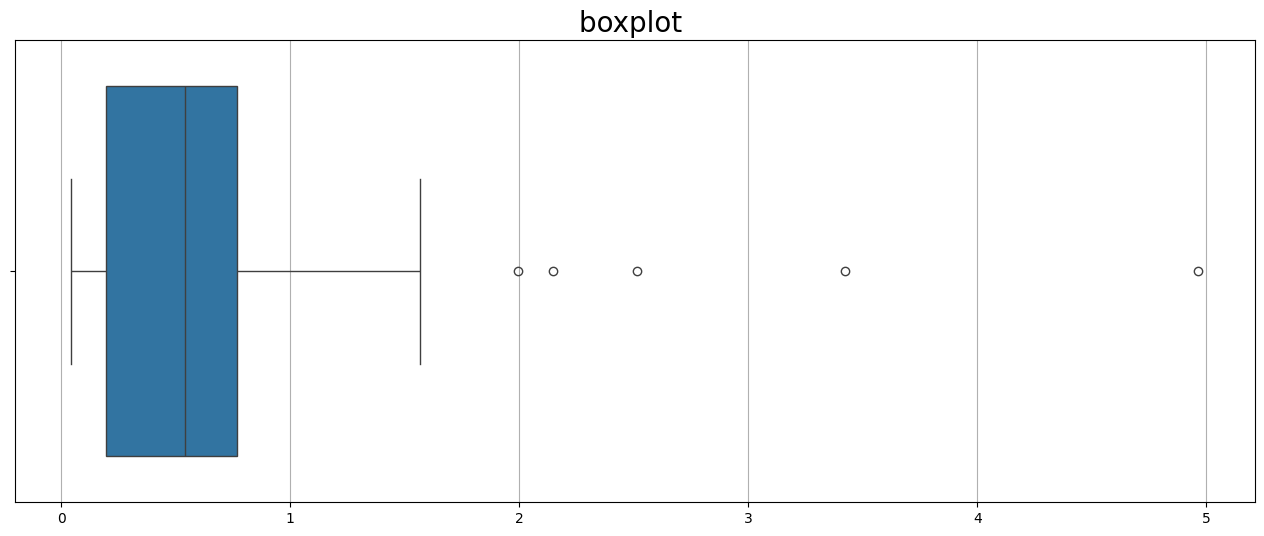

In [122]:
#boxplot


plt.figure(figsize = (16, 6))
plt.grid()
sns.boxplot(x = example)
plt.title('boxplot ', fontsize=20)
plt.show()


## ПУНКТ С И d

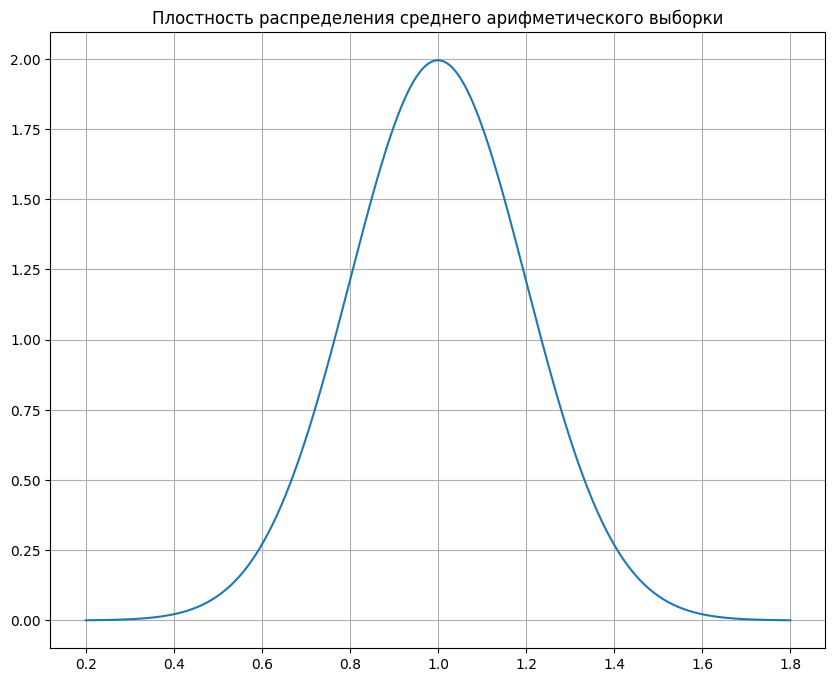

In [160]:
#Плостность распределения среднего арифметического выборки
def distribution(x):
    mu = 1
    sigma =  1/5
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = 1/((2 * np.pi) ** 0.5 * sigma) * np.e ** (-(x - mu) ** 2 / (2 * sigma ** 2) )
    
    plt.figure(figsize = (10, 8))
    plt.plot(x, y)

distribution(example)
plt.grid()
plt.title("Плостность распределения среднего арифметического выборки")
plt.show()

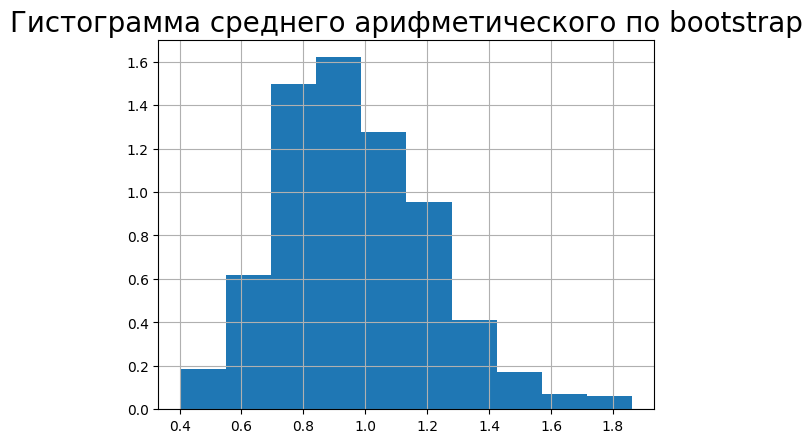

In [158]:
#бутстраповская оценка плотности
def bootstrap(x):
    bootstrap_array = np.array([])
    for i in range(1000):
        subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(np.mean(subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    plt.hist(bootstrap_array, bins=n, density = True)

bootstrap(example)
plt.grid()
plt.title('Гистограмма среднего арифметического по bootstrap', fontsize=20)
plt.show()

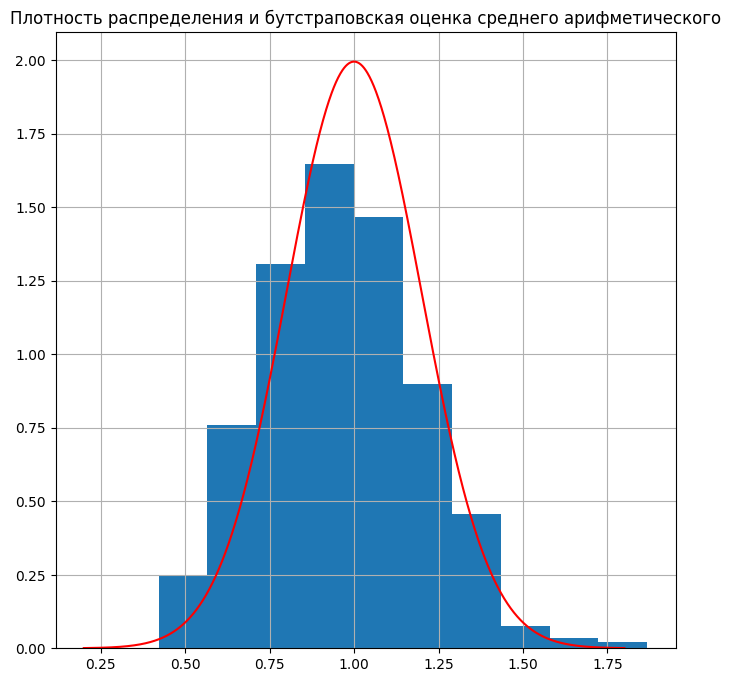

In [183]:
#сравнение плотности распределения с бутстраповской оценкой
def compare(x):
    
    bootstrap_array = np.array([])
    for i in range(1000):
        subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(np.mean(subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    mu = 1
    sigma =  1/5 
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    y = 1/((2 * np.pi) ** 0.5 * sigma) * np.e ** (-(x - mu) ** 2 / (2 * sigma ** 2) )
    
    plt.figure(figsize = (8, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True)
    plt.plot(x, y, color = "red")
    plt.title("Плотность распределения и бутстраповская оценка среднего арифметического")
    plt.show()
compare(example)

## ПУНКТ е

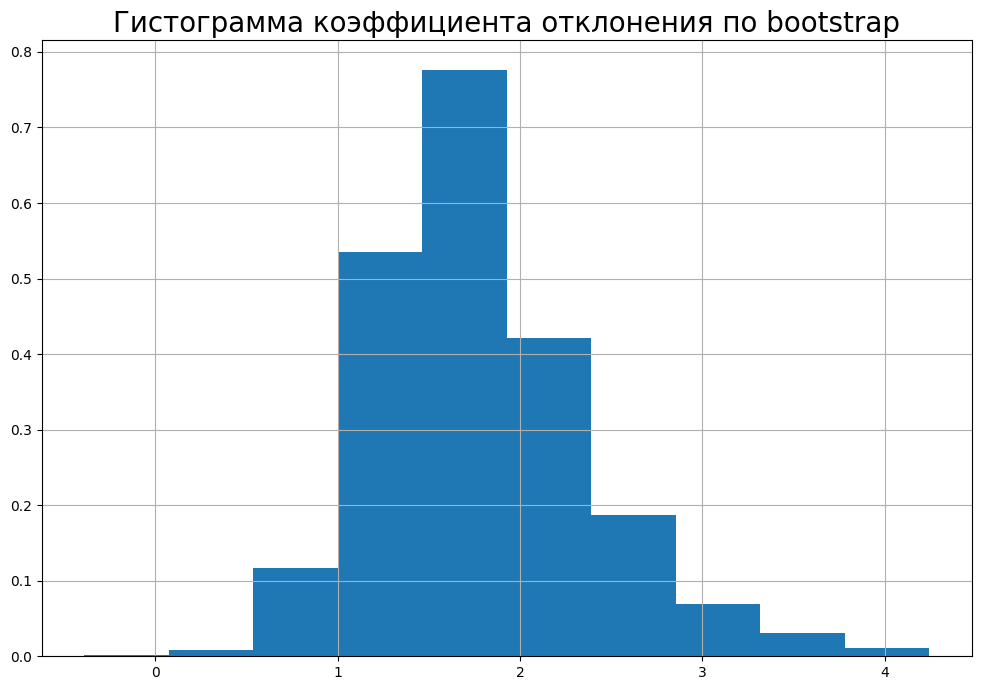

In [182]:
#Гистограмма коэффициента отклонения по bootstrap
def assymetric_coeff_bootstrap(x):
    bootstrap_array = np.array([])
    for i in range(1000):
        subsample = np.array([rd.choice(x) for i in range (25)])
        coeff = assymetric_coeff(subsample)
        bootstrap_array = np.append(coeff, bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    plt.figure(figsize = (12, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True)
    plt.title("Гистограмма коэффициента отклонения по bootstrap", fontsize=20)
    plt.show()
assymetric_coeff_bootstrap(example)

## ПУНКТ е

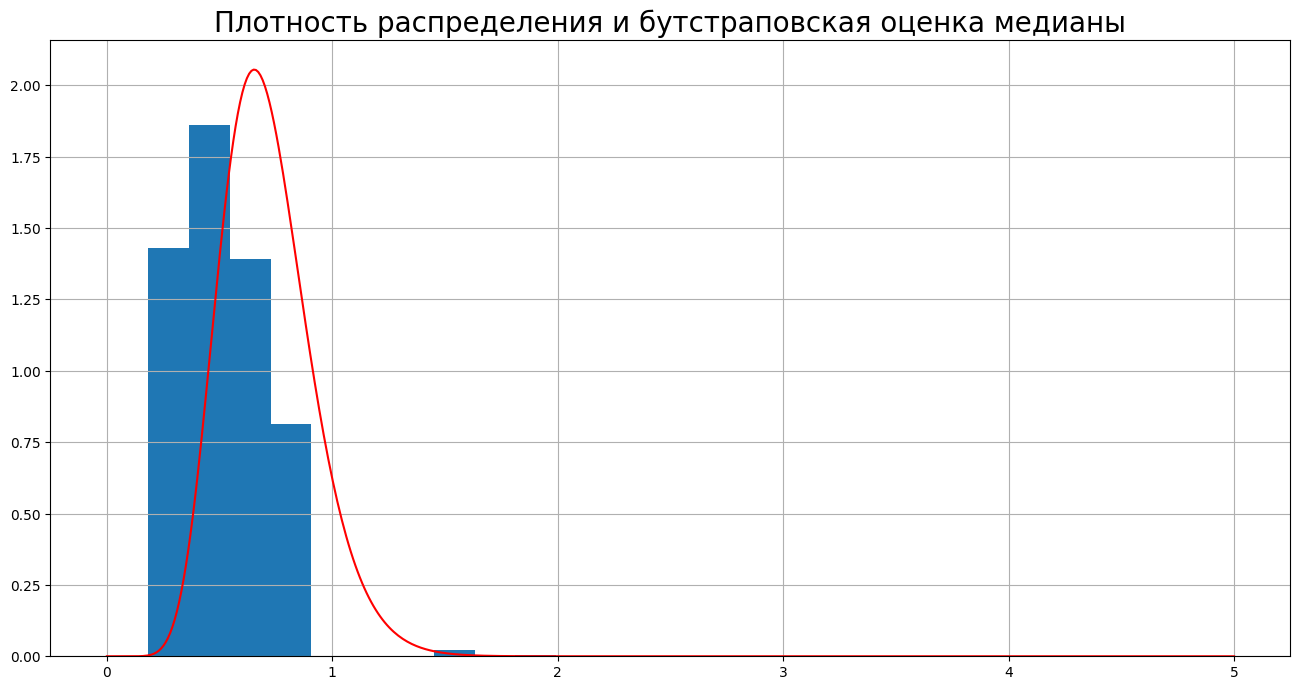

In [197]:
#Плотность распределения и бутстраповская оценка медианы

    
def compare_median(x):    
    bootstrap_array = np.array([])
    for i in range(1000):
        subsample = np.array([rd.choice(x) for i in range (25)])
        bootstrap_array = np.append(mediana(subsample), bootstrap_array)
    n = 1 + int(np.log2(1000))
    
    combin = math.comb(24, 12)
    x = np.linspace(0, 5, 500)
    y = 25 * (np.e ** -x ) * combin * (1 - np.e ** -x) ** 12 * (np.e ** -x) ** 12
    
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(bootstrap_array, bins=n, density = True)
    plt.plot(x, y, color = "red")
    plt.title("Плотность распределения и бутстраповская оценка медианы", fontsize=20)
    plt.show()

compare_median(example)